In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

import wf_psf.script_utils as wf_script_utils

In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

# Metrics

In [3]:
metrics_file = '../wf-outputs/metrics/metrics-poly_%s_cycles_256_%s_d%s_%s.npy'
dataset_list = [('1', 'no_proj', '2'),('1', 'proj', '2'),('2', 'no_proj', '2'),('2', 'proj', '2'),('5', 'no_proj', '2'),('5', 'proj', '2'),('9', 'no_proj', '2'),('9', 'proj', '2')]
n_cycles_list = [1,2,5,9]

In [4]:
n_realisations = 5
metrics_dict_list = []
for idx in range(n_realisations):
    metrics_dict_list_ = wf_script_utils.extract_shape_pix_results([np.load(metrics_file % (dataset+(str(idx),)), allow_pickle=True)[()] for dataset in dataset_list ])
    metrics_dict_list.append(metrics_dict_list_)

metrics_dict_list_np = np.array(metrics_dict_list)

In [5]:
metrics_mean = np.mean(metrics_dict_list_np,axis=0)
metrics_median = np.median(metrics_dict_list_np,axis=0)
metrics_std = np.std(metrics_dict_list_np, axis=0)



In [18]:
metrics_mean[2,0] = np.mean(metrics_dict_list_np[:,2,:2])
metrics_mean[2,1] = np.mean(metrics_dict_list_np[:,2,:2])
metrics_median[2,0] = np.median(metrics_dict_list_np[:,2,:2])
metrics_median[2,1] = np.median(metrics_dict_list_np[:,2,:2])
metrics_std[2,0] = np.std(metrics_dict_list_np[:,2,:2])
metrics_std[2,1] = np.std(metrics_dict_list_np[:,2,:2])


In [19]:
print('n cycles | project | d_max param |    mean SR RMSE\n')
for idx, dataset in enumerate(dataset_list):
    print('%s cycles - %s - d_max=%s' % dataset, ' ---> ', metrics_mean[2][idx])

n cycles | project | d_max param |    mean SR RMSE

1 cycles - no_proj - d_max=2  --->  3.67286229506135
1 cycles - proj - d_max=2  --->  3.67286229506135
2 cycles - no_proj - d_max=2  --->  3.5802656412124634
2 cycles - proj - d_max=2  --->  3.2399240136146545
5 cycles - no_proj - d_max=2  --->  3.4548090770840645
5 cycles - proj - d_max=2  --->  3.690134845674038
9 cycles - no_proj - d_max=2  --->  3.629828989505768
9 cycles - proj - d_max=2  --->  4.539961218833923


In [20]:
print('n cycles | project | d_max param |    median SR RMSE\n')
for idx, dataset in enumerate(dataset_list):
    print('%s cycles - %s - d_max=%s' % dataset, ' ---> ', metrics_median[2][idx])

n cycles | project | d_max param |    median SR RMSE

1 cycles - no_proj - d_max=2  --->  3.7389134988188744
1 cycles - proj - d_max=2  --->  3.7389134988188744
2 cycles - no_proj - d_max=2  --->  3.756915405392647
2 cycles - proj - d_max=2  --->  2.5398802012205124
5 cycles - no_proj - d_max=2  --->  3.0508631840348244
5 cycles - proj - d_max=2  --->  4.037199541926384
9 cycles - no_proj - d_max=2  --->  3.323720768094063
9 cycles - proj - d_max=2  --->  4.973854497075081


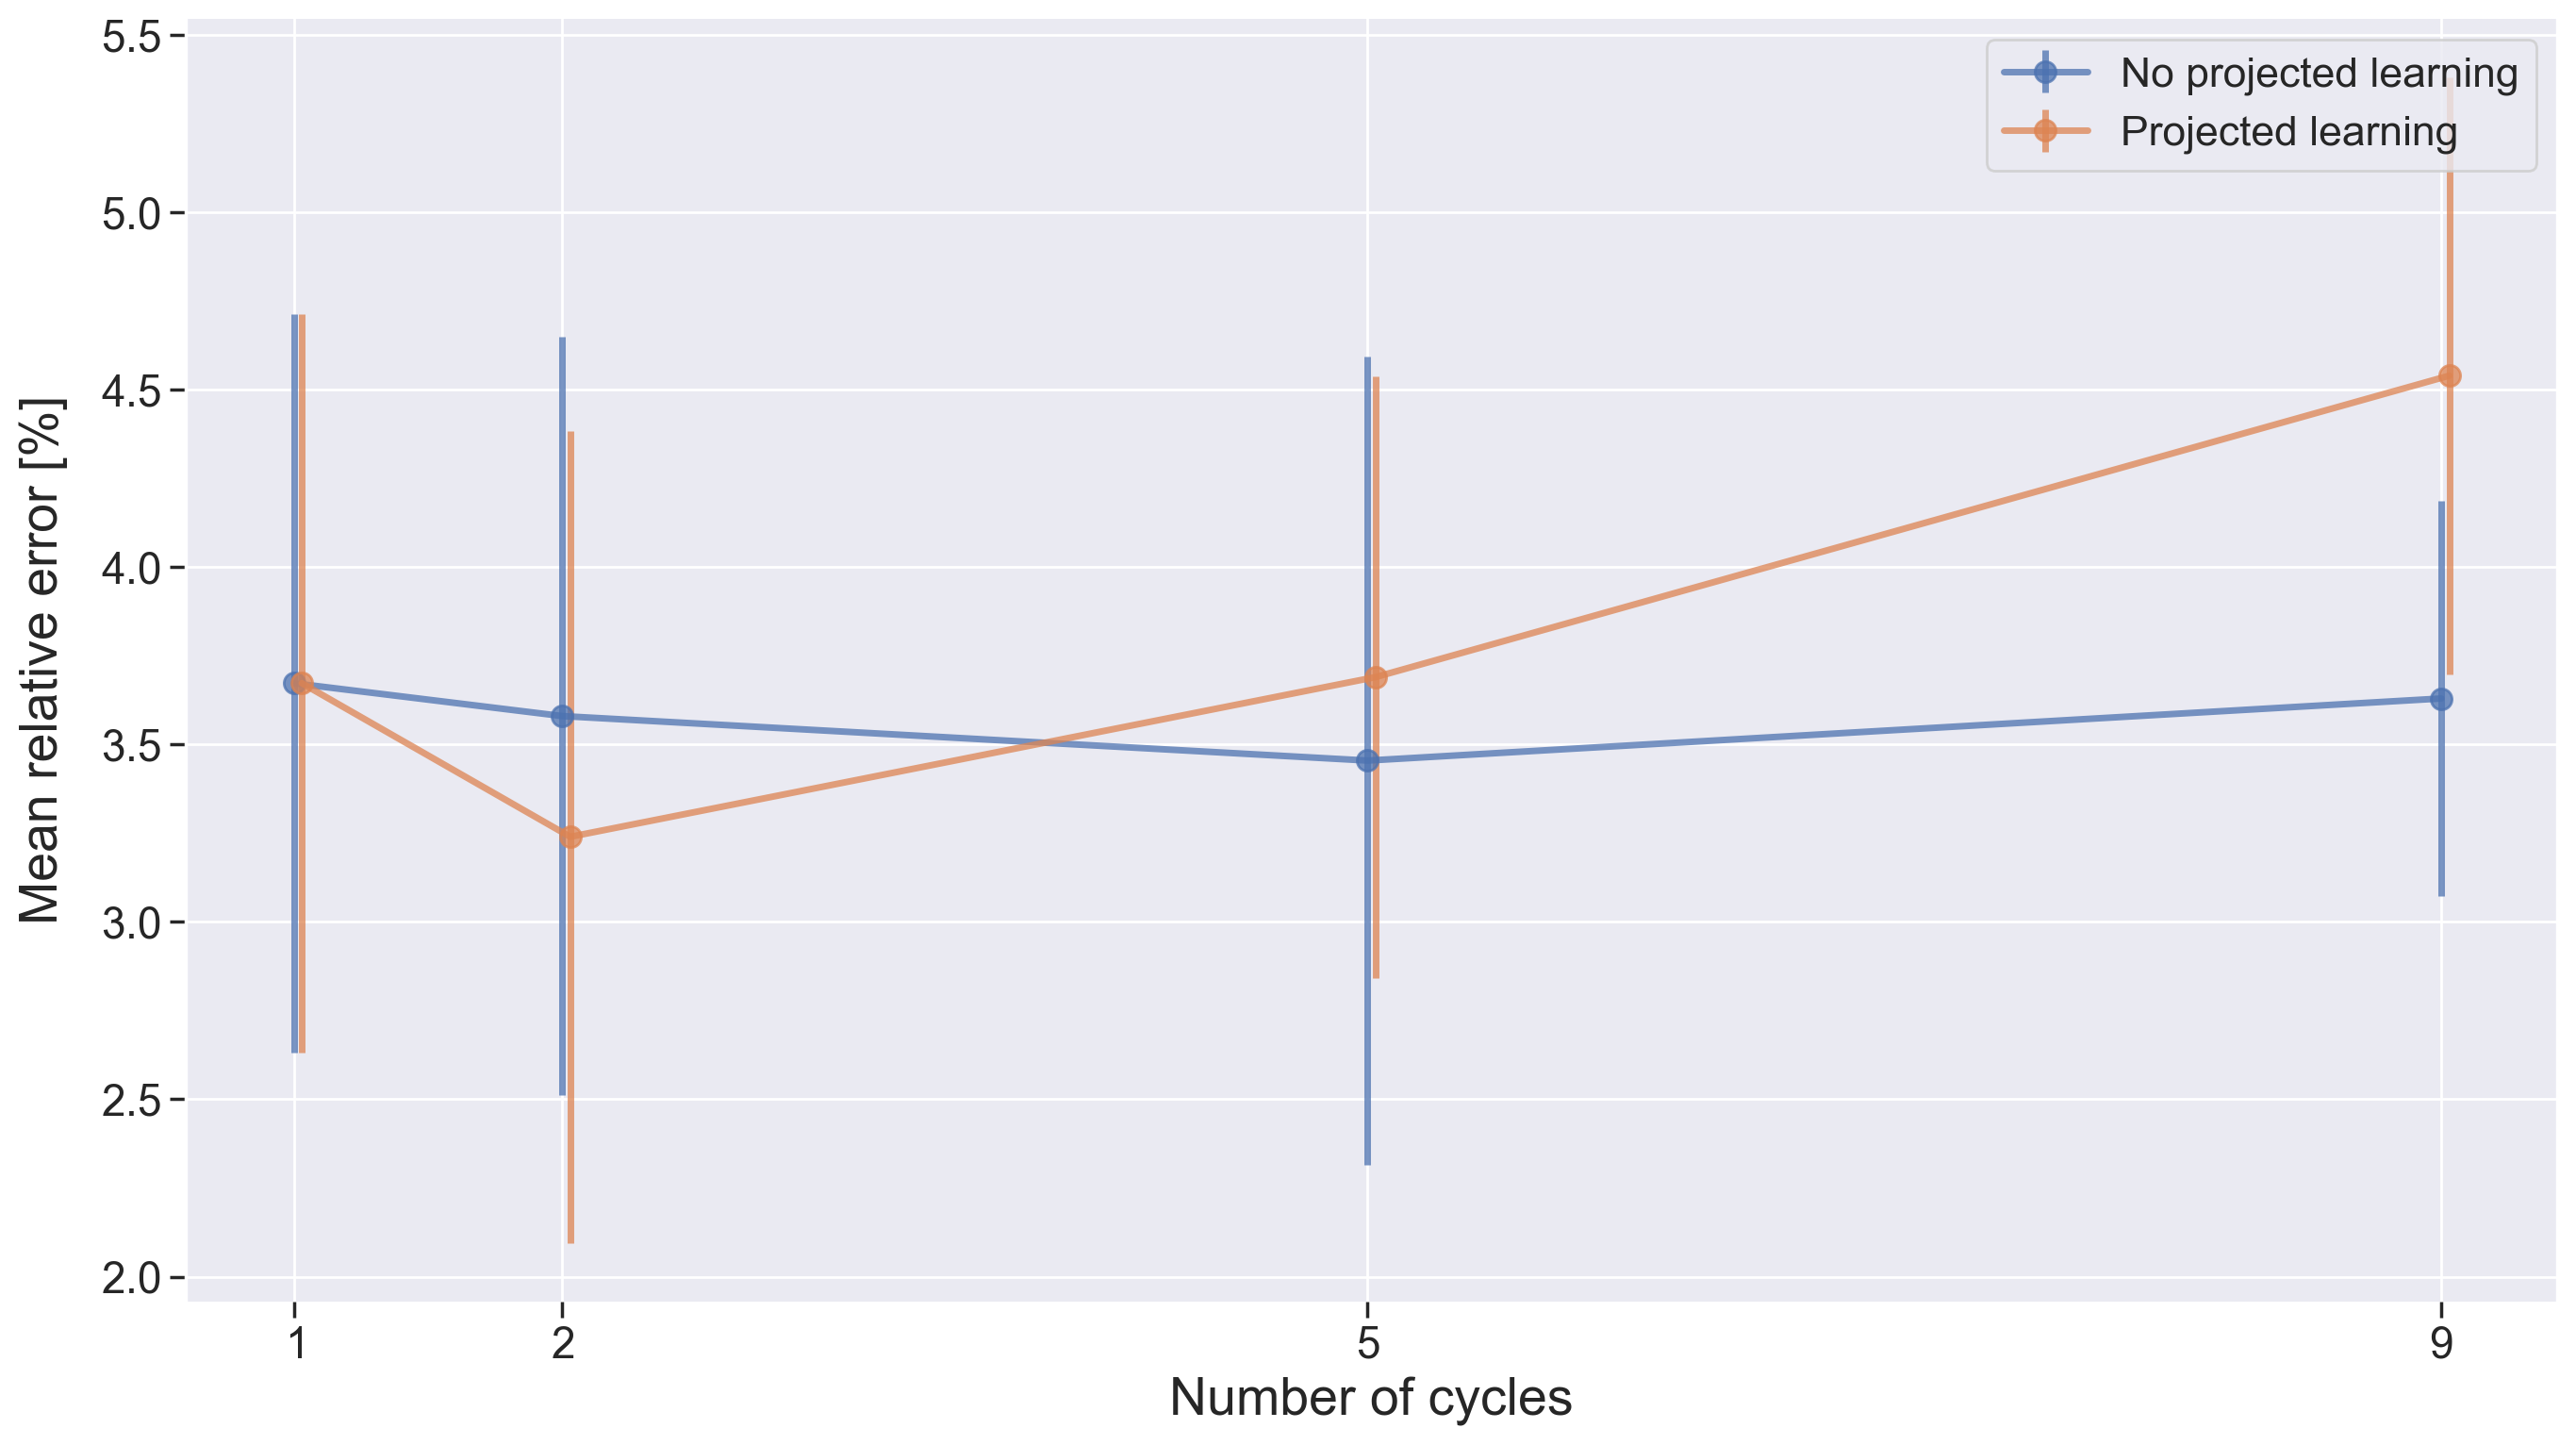

In [22]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.errorbar(n_cycles_list, metrics_mean[2][0::2], metrics_std[2][0::2], label='No projected learning', **kwargs)
ax1.errorbar(np.array(n_cycles_list)+3e-2, metrics_mean[2][1::2], metrics_std[2][1::2], label='Projected learning', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_cycles_list)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Mean relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of cycles', fontsize = 20)

plt.savefig('../figures/RMSE_proj_vs_no_proj_mean.pdf')
plt.show()

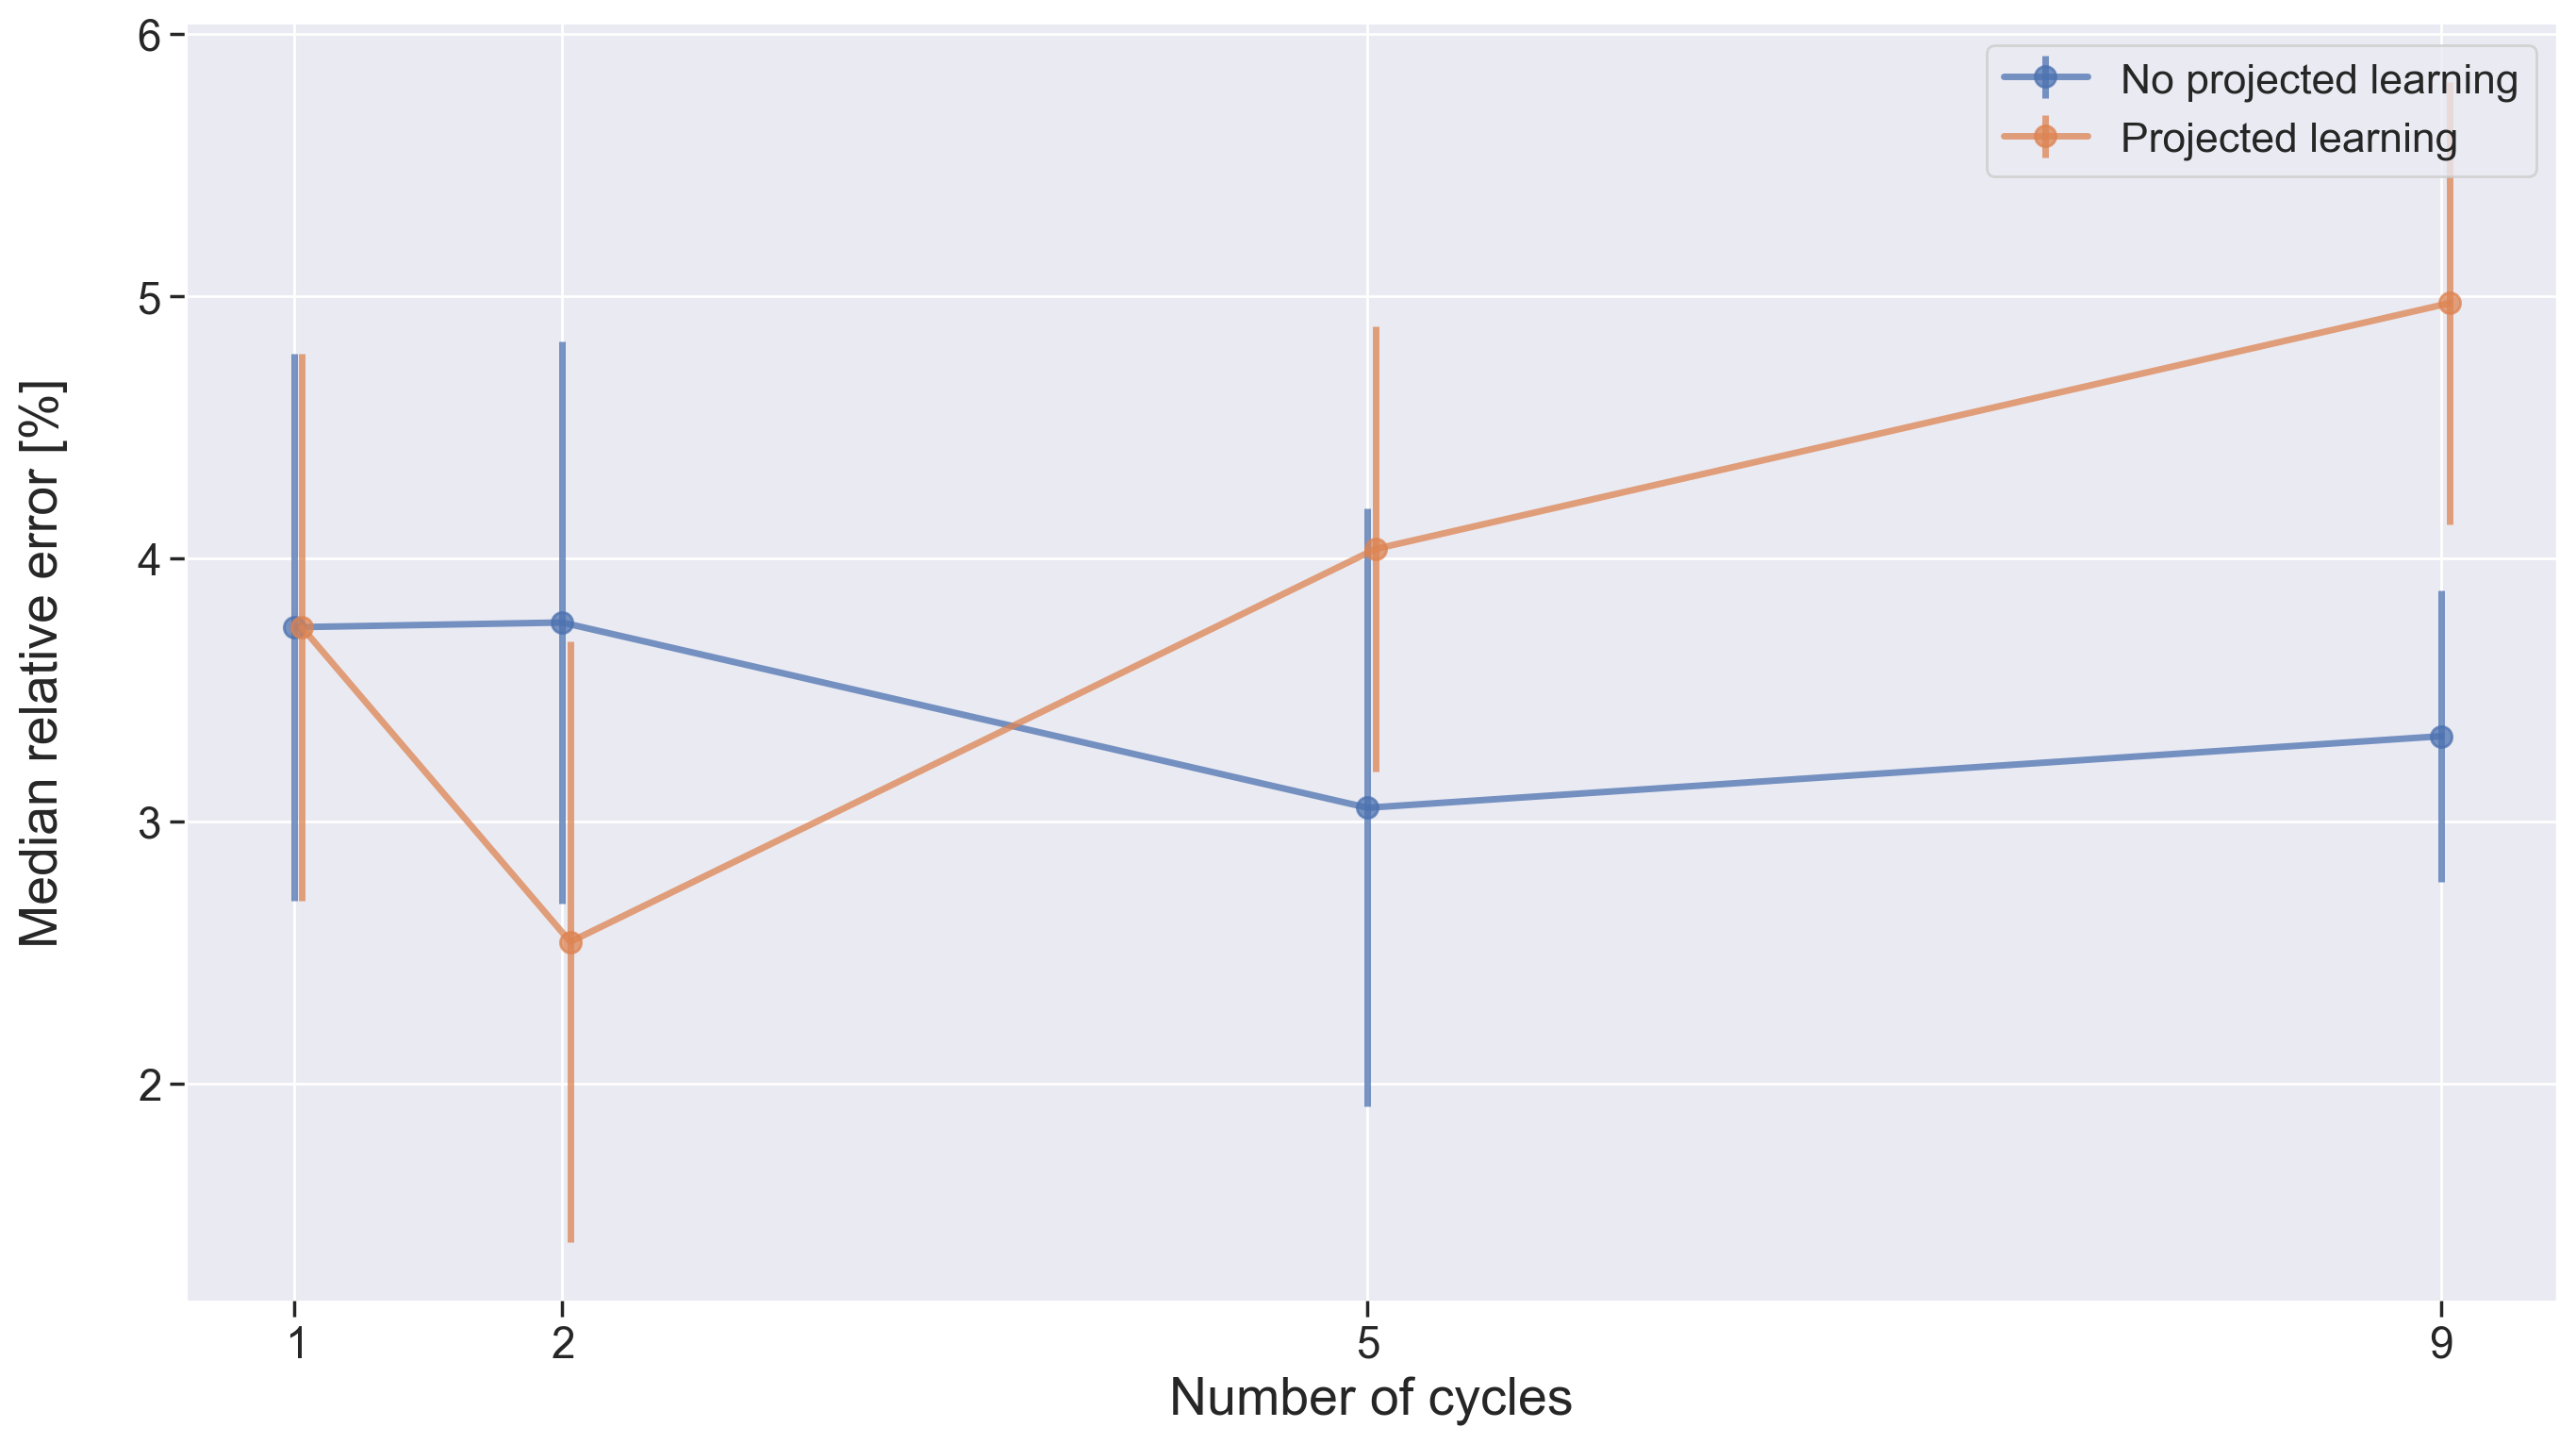

In [23]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.errorbar(n_cycles_list, metrics_median[2][0::2], metrics_std[2][0::2], label='No projected learning', **kwargs)
ax1.errorbar(np.array(n_cycles_list)+3e-2, metrics_median[2][1::2], metrics_std[2][1::2], label='Projected learning', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(n_cycles_list)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Median relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of cycles', fontsize = 20)

plt.savefig('../figures/RMSE_proj_vs_no_proj_median.pdf')
plt.show()